In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '56129097'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.6613866090774536
Formulating a new plan based on User input
Modifying plan with function metadata
{'Plan': {'messages': [HumanMessage(content='Updated Plan:\n\n1. Use the `pitching_stats` function from the pybaseball library.\n2. Pass in the following attributes:\n   - season: 2018\n   - player_id: MLBAM player ID for Danny Duffy\n3. Retrieve the output dataframe from the function.\n4. Look for the "SO" (strikeouts) column in the dataframe.\n5. Calculate the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.\n6. Plot the cumulative sum of strikeouts over time to visualize the trend.\n\nAre you satisfied with this plan?')], 'task': 'Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', 'plan': 'Updated Plan:\n\n1. Use the `pitching_stats` function from the pybaseball library.\n2. Pass in the following attributes:\n   - season: 2018\n   - player_id: MLBAM player ID for Dann

In [6]:
task = "calculate the cumulative sum by first summing the strikeouts for each date and then calculating a cumulative sum across the dates"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Based on the feedback, it seems the original plan needs to be adjusted to include steps for identifying the player ID for Danny Duffy, as well as modifying the approach to calculate the cumulative sum of strikeouts by date before plotting. Here\'s the revised plan:\n\nRevised Plan:\n\n1. Use the `playerid_lookup` function from the pybaseball library to find Danny Duffy\'s MLBAM player ID.\n   - Pass in "Duffy" as the last name and "Danny" as the first name.\n2. Retrieve the output dataframe from the `playerid_lookup` function.\n3. Extract Danny Duffy\'s MLBAM player ID from the dataframe.\n4. Use the `statcast_pitcher` function from the pybaseball library.\n   - Pass in a date range for the 2018 season (e.g., start_dt="2018-03-29", end_dt="2018-10-01") and the MLBAM player ID for Danny Duffy.\n5. Retrieve the output dataframe from the `statcast_pitcher` function.\n6. Filter the dataframe for events 

In [7]:
task = '''The x-axis should be the game date and the y-axis should be the sum of strikeouts thrown to that point in the season'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Given the feedback, it\'s clear that the focus is on ensuring the x-axis represents the game date and the y-axis accurately reflects the cumulative sum of strikeouts up to each point in the season. The revised plan already outlines steps to achieve this, but let\'s ensure clarity and precision in the steps related to plotting, as well as confirming the approach to data manipulation for cumulative sums. Here\'s an even more detailed revision of the plan with an emphasis on the plotting step to meet the feedback requirements:\n\nRevised Plan:\n\n1. Use the `playerid_lookup` function from the pybaseball library to find Danny Duffy\'s MLBAM player ID.\n   - Pass in "Duffy" as the last name and "Danny" as the first name to ensure accuracy.\n2. Retrieve the output dataframe from the `playerid_lookup` function.\n3. Extract Danny Duffy\'s MLBAM player ID from the dataframe, focusing on the `key_mlbam` colum

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': '\n# Import necessary libraries\nimport pandas as pd\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n\n# Step 1: Use the playerid_lookup function to find Danny Duffy\'s MLBAM player ID\n# Note: The pybaseball library provides a convenient way to look up player IDs\nplayer_id_df = playerid_lookup(\'Duffy\', \'Danny\')\n\n# Step 2: The output is already stored in player_id_df\n\n# Step 3: Extract Danny Duffy\'s MLBAM player ID\n# Note: We focus on the \'key_mlbam\' column to get the specific ID we need\nduffy_mlbam_id = player_id_df[\'key_mlbam\'].iloc[0]\n\n# Step 4: Fetch pitch-level data for Danny Duffy for the 2018 season\n# Note: We specify the date range for the 2018 MLB season and use Duffy\'s MLBAM ID\nduffy_2018_data = statcast_pitcher(\'2018-03-29\', \'2018-10-01\', duffy_mlbam_id)\n\n# Step 5: The output dataframe is stored in duffy_2018_data\n\n# Step 6: Filter the dataf

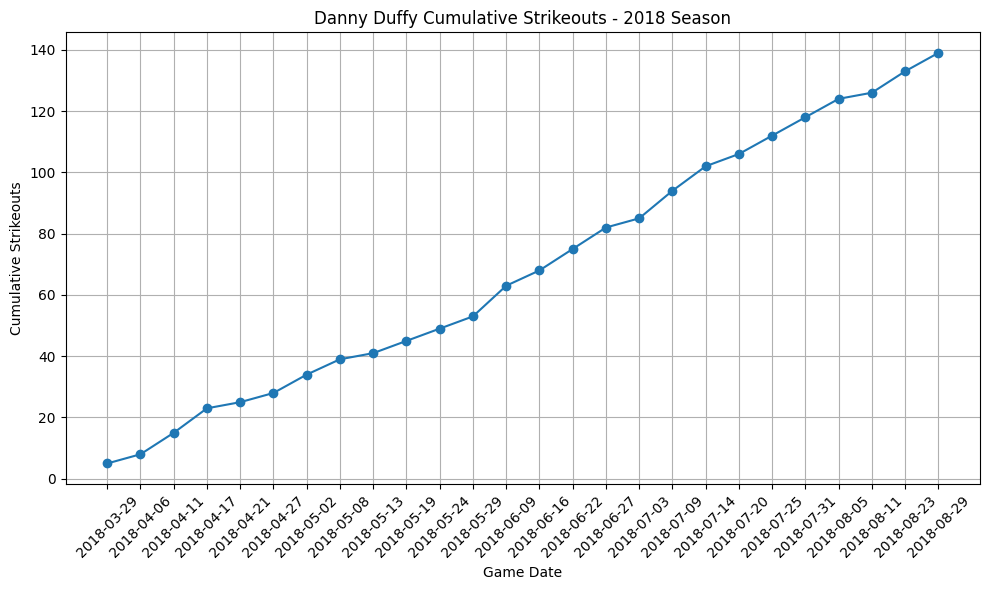

Result: 
Executing: # Step 10: Review the plot to ensure it accurately reflects the performance
# Note: The plot visually represents the cumulative strikeouts over the 2018 season
#       with the game date on the x-axis and the cumulative sum of strikeouts on the y-axis.

Result: 
{'Execute': {'messages': [AIMessage(content='\nHere is the code that was used to reach this solution:\n```python\n\n# Import necessary libraries\nimport pandas as pd\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n# Step 1: Use the playerid_lookup function to find Danny Duffy\'s MLBAM player ID\n# Note: The pybaseball library provides a convenient way to look up player IDs\nplayer_id_df = playerid_lookup(\'Duffy\', \'Danny\')\n# Step 2: The output is already stored in player_id_df\n# Step 3: Extract Danny Duffy\'s MLBAM player ID\n# Note: We focus on the \'key_mlbam\' column to get the specific ID we need\nduffy_mlbam_id = player_id_df[\'key_mlbam\'].iloc[0]\n# Ste

In [8]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [9]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
